# Punto 6. Insertion sort

Función de Insertion sort que cuenta el numero de pasos, comparaciones e intercambios.

In [17]:
import numpy as np
import time
import itertools
import matplotlib.pyplot as plt

def insertion_sort (arr, lenght):
	#variables counter
    num_pasos = 0
    num_compare = 0
    num_interc = 0
    array = np.zeros (lenght, dtype=int)
    i = 1
    	#insert sort code + counters
    while (i < lenght):
        temp = arr[i]
        j = i-1
        while (True):
            num_compare += 1 #compares
            array[i] += 1
	    
            if(j < 0):
		break
            if(temp >= arr[j]):
		break
            num_interc += 1   #intercambia
            arr [j+1] = arr[j]
            j -= 1;
	    num_pasos += 3
	    
        arr[j+1] = temp;
	num_pasos += 1;
        i += 1;
	num_pasos += 4
    num_pasos += 1
    
    return arr, num_pasos,num_compare,num_interc, array

Aquí creamos una clase para las permutaciones.

In [18]:
class Permutation:
    def __init__(self):
        self.arr = [] 
        self.used = [0]*100 # max 100 perm.
        self.pos = 0
        self.perm = []
		
    def perm_aux(self,n):
        if(self.pos == n):
            self.arr.append (list(self.perm))
            return
        self.pos += 1        
        for i in range(n):
            if(self.used[i] == 1): 
		continue
            self.used[i] = 1;
	    self.perm.append(i);
            self.perm_aux(n)
            self.used[i] = 0;
	    self.perm.pop()
        self.pos -= 1
    
    def permutations (self,n):
        self.__init__()
        self.perm_aux(n)
        return self.arr

En esta función count calculamos la distribución según las permutaciones. Se usa itertools y recursividad.

In [19]:
def count (m,**kwargs):
    n = kwargs.get('n',None)
    perm = []
    num_perm = 0
    	#itertools
    if(m == 0):  
        perm = np.array(list(itertools.permutations(range(n))))
        num_perm = len(perm)
	#recursive
    elif(m == 1):
        e = Permutacion()				
        permutacion = e.permutations(n)	
        numeroPermutaciones = len(permutacion)
	
    pasos = np.empty(num_perm)			
    compare = np.empty(num_perm)	
    interc = np.empty(num_perm)	
    for i in range (num_perm):
        arr_aux = np.copy(perm[i])
        arr,num_pasos, num_compare, num_interc, array = insertion_sort(arr_aux,n)
        pasos[i] = num_pasos
        compare [i] = num_compare
        interc[i] = num_interc
    return pasos, compare, interc, perm, num_perm


Ahora creamos cada histrogramas.

In [26]:
def histograma_pasos(pasos,num_perm,n):
    min_num_pasos, max_num_pasos = min(pasos), max(pasos)		
    plt.hist(pasos, bins=np.arange(min_num_pasos,max_num_pasos + 1, 1), normed=1)	
    plt.title("Pasos n = "+str(n))
    plt.xlabel('pasos')
    plt.ylabel('Probaility')				
    plt.show()																		    
    #Imprimir datos
    vals,counts = np.unique(pasos,return_counts=True)
    print("\n-Promedio: "+str(np.average(pasos))+" -Minimo: "+str(min_num_pasos) +
    " -Maximo: "+str(max_num_pasos))
    
def histograma_compare(comparaciones,num_perm,n):
    min_num_pasos, max_num_pasos = min(comparaciones), max(comparaciones)		
    plt.hist(comparaciones, bins=np.arange(min_num_pasos, max_num_pasos + 1, 1), normed=1)	
    plt.title ("Comparaciones n = "+str(n))
    plt.xlabel('comparaciones')
    plt.ylabel('Probaility')
    plt.show()

    #Imprimir datos
    vals,counts = np.unique(compare,return_counts=True)
    print("\n-Promedio: "+str(np.average(compare)) + " -Minimo: "+str(min_num_pasos)+
          " -Maximo: "+str(max_num_pasos))
        
def histograma_interc(intercambios,num_perm,n):
    min_num_pasos,max_num_pasos = min(interc), max(interc)	
    plt.hist(intercambios, bins=np.arange(min_num_pasos,max_num_pasos + 1, 1), normed=1)	
    plt.title("Intercambios n = "+str(n))
    plt.xlabel('intercambios')
    plt.ylabel('Probaility')			
    plt.show()
    
    vals,counts = np.unique(intercambios,return_counts=True)
    print("\n-Promedio: "+str(np.average(intercambios))+" -Minimo: "+str(min_num_pasos)+
          " -Maximo: "+str(max_num_pasos))

Finalmente ejecutamos. Para este caso escogimos n = 7, el número de permutaciones.

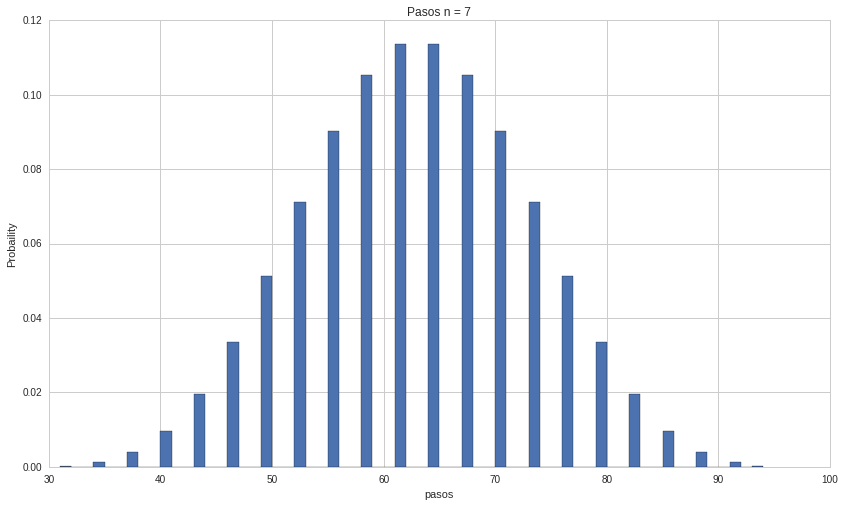


-Promedio: 62.5 -Minimo: 31.0 -Maximo: 94.0


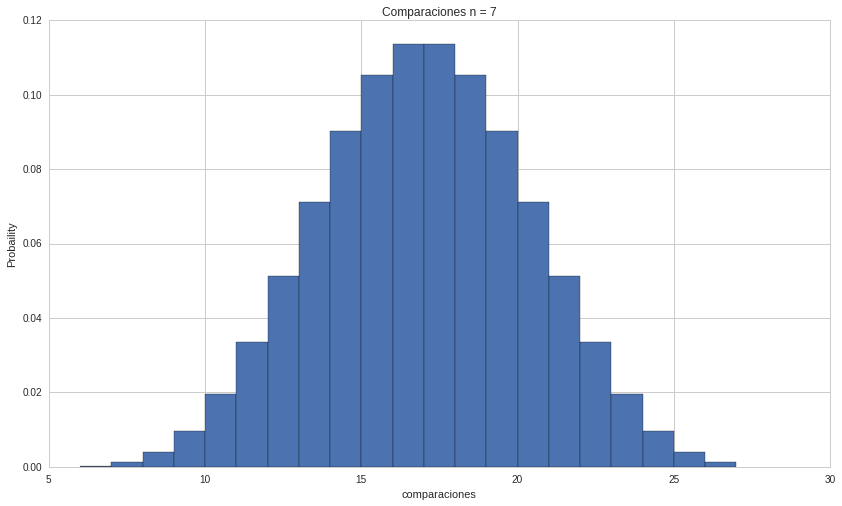


-Promedio: 16.5 -Minimo: 6.0 -Maximo: 27.0


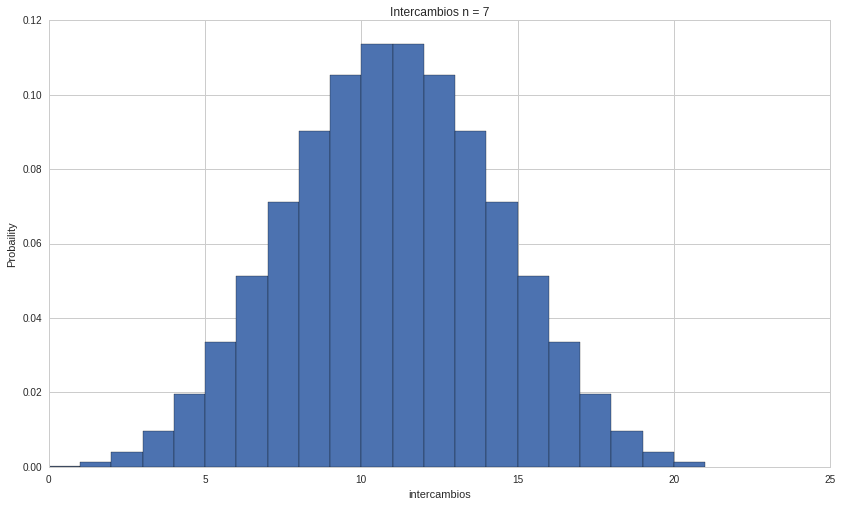


-Promedio: 10.5 -Minimo: 0.0 -Maximo: 21.0


In [28]:
nPermRequired = 7 
pasos,compare,interc,permutacion,num_perm = count(0,n=nPermRequired)
histograma_pasos(pasos,num_perm,nPermRequired)
histograma_compare(compare,num_perm,nPermRequired)
histograma_interc(interc,num_perm,nPermRequired)